## Imports

In [1]:
import pandas as pd

import numpy as np

from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
from nilearn import surface
from nilearn import datasets
from nilearn.reporting import get_clusters_table
from nilearn.image import resample_to_img
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
#from nilearn.maskers import NiftiLabelsMasker

from scipy.stats import norm

import glob

from natsort import natsorted

import matplotlib.pyplot as plt

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
#pip install natsort --user

In [3]:
import nilearn
print(nilearn.__version__)

0.9.1


In [4]:
#pip install nilearn --upgrade --user

In [5]:
fsaverage = datasets.fetch_surf_fsaverage(data_dir='./fsaverage/')

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)
/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


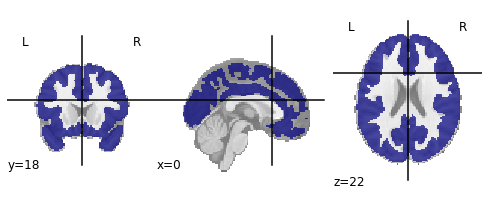

In [6]:
sample = './openNeuro_LPP/english/subj057/section15.nii.gz'


Yeo = 'Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
resampled_Yeo = resample_to_img(source_img=Yeo, target_img=sample,interpolation='nearest')

#plotting.plot_roi(resampled_Yeo,cut_coords=(-0,18,22))

parcelation_masker = NiftiLabelsMasker(labels_img=resampled_Yeo)
time_series = parcelation_masker.fit_transform(sample)

resampled_yeo_binary = parcelation_masker.inverse_transform([[1,1,1,1,1,1,1]])
plotting.plot_roi(resampled_yeo_binary,cut_coords=(0,18,22))

# Object-Relatives

## Two-Sample T-Test

In [7]:
chinese_objRel_files = natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/*obj_relatives_eff*"))
print(len(chinese_objRel_files))
chinese_objRel_files

33


['/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj0_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj1_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj2_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj3_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj4_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj5_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj6_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj7_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj8_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj9_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/subj10_obj_relatives_

In [8]:
english_objRel_files = natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/*obj_relatives_eff*"))[-33:]
print(len(english_objRel_files))
english_objRel_files

33


['/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj15_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj16_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj17_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj18_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj19_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj20_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj21_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj22_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj23_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj24_obj_relatives_eff.nii.gz',
 '/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/subj25_obj_

In [9]:
files = []

for file in chinese_objRel_files:
    files.append(file)
    
for file in english_objRel_files:
    files.append(file)

print(len(files))
#files

66


In [10]:
chinese = []
english = []

for i in range(len(chinese_objRel_files)):
    chinese.append(1)
    english.append(0)
    
for i in range(len(english_objRel_files)):
    chinese.append(0)
    english.append(1)

design_matrix = pd.DataFrame(data = {'chinese':chinese,
                                    'english':english})
print(len(design_matrix))

66


<AxesSubplot:label='conditions', ylabel='scan number'>

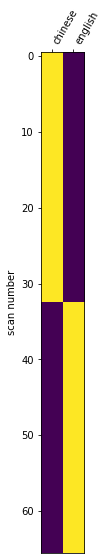

In [11]:
plotting.plot_design_matrix(design_matrix)

In [12]:
t_test = SecondLevelModel(smoothing_fwhm=8.0,
                            mask_img=resampled_yeo_binary)
t_test = t_test.fit(files,
                          design_matrix=design_matrix)

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)


In [13]:
chinese_objRel_map = t_test.compute_contrast('chinese',output_type='z_score')

english_objRel_map = t_test.compute_contrast('english',output_type='z_score')


english_greater_chinese = t_test.compute_contrast('english - chinese', output_type='z_score')
chinese_greater_english = t_test.compute_contrast('chinese - english', output_type='z_score')

2.9447206785687574


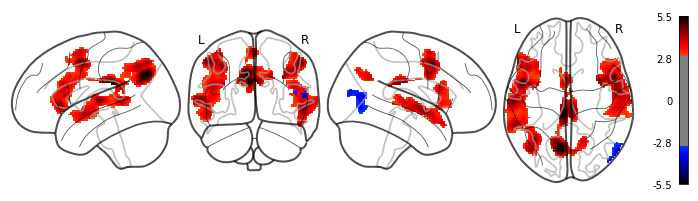

In [14]:
chinese_objRel_thresholded, chinese_objRel_threshold = threshold_stats_img(chinese_objRel_map, alpha=.05, 
                                    height_control = 'fdr',two_sided=True,cluster_threshold=150)
print(chinese_objRel_threshold)
plotting.plot_glass_brain(chinese_objRel_thresholded,plot_abs=False, 
                          threshold = chinese_objRel_threshold,display_mode='lyrz',colorbar=True)

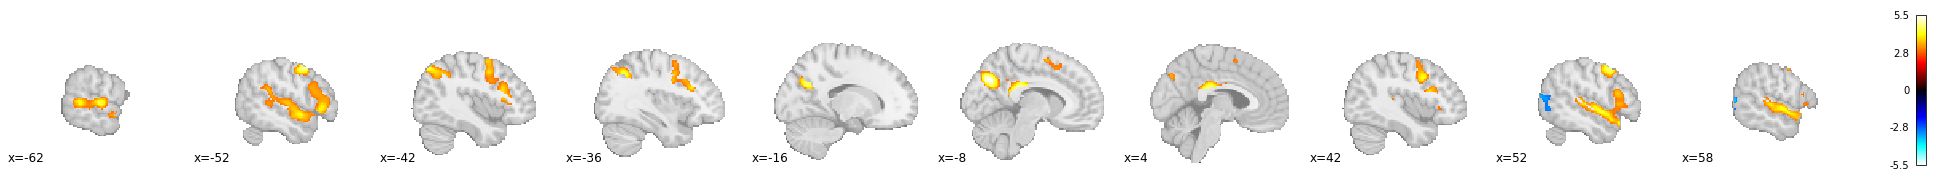

In [15]:
plotting.plot_stat_map(stat_map_img = chinese_objRel_thresholded, 
                          display_mode = 'x',cut_coords=10)

In [16]:
chinese_objRel_thresholded.to_filename('openNeuro_LPP/sencond_level/chinese_objRel.nii.gz')

In [17]:
table = get_clusters_table(chinese_objRel_thresholded, stat_threshold = chinese_objRel_threshold, two_sided=True)


table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
#table = table.drop(columns='Peak Stat')
table

,Cluster Size (mm3),X,Y,Z,Peak Stat
0,10296,-8.0,-70.0,34.0,5.54
1,,-6.0,-34.0,24.0,5.36
2,,2.0,-30.0,26.0,4.78
3,,18.0,-64.0,32.0,3.94
4,14456,-52.0,2.0,48.0,5.00
5,,-56.0,26.0,0.0,4.50
6,,-46.0,20.0,20.0,4.13
7,,-44.0,20.0,12.0,4.01
8,5496,52.0,10.0,48.0,4.93
9,,34.0,4.0,34.0,4.37


In [18]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &              10296 &  -8.0 & -70.0 &  34.0 &       5.54 \\
1  &                    &  -6.0 & -34.0 &  24.0 &       5.36 \\
2  &                    &   2.0 & -30.0 &  26.0 &       4.78 \\
3  &                    &  18.0 & -64.0 &  32.0 &       3.94 \\
4  &              14456 & -52.0 &   2.0 &  48.0 &       5.00 \\
5  &                    & -56.0 &  26.0 &   0.0 &       4.50 \\
6  &                    & -46.0 &  20.0 &  20.0 &       4.13 \\
7  &                    & -44.0 &  20.0 &  12.0 &       4.01 \\
8  &               5496 &  52.0 &  10.0 &  48.0 &       4.93 \\
9  &                    &  34.0 &   4.0 &  34.0 &       4.37 \\
10 &                    &  42.0 &   8.0 &  38.0 &       4.34 \\
11 &              13688 & -62.0 & -18.0 &   6.0 &       4.69 \\
12 &                    & -60.0 & -44.0 &   6.0 &       4.40 \\
13 &                    & -50.0 &  -2.0 &  -8.0 &       4.23 \

2.9265586785373197


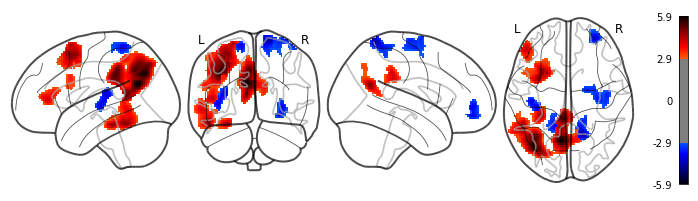

In [19]:
english_objRel_thresholded, english_objRel_threshold = threshold_stats_img(english_objRel_map, alpha=.05, 
                                    height_control = 'fdr',two_sided=True,cluster_threshold=150)
print(english_objRel_threshold)
plotting.plot_glass_brain(english_objRel_thresholded,plot_abs=False, 
                          threshold = english_objRel_threshold,display_mode='lyrz',colorbar=True)

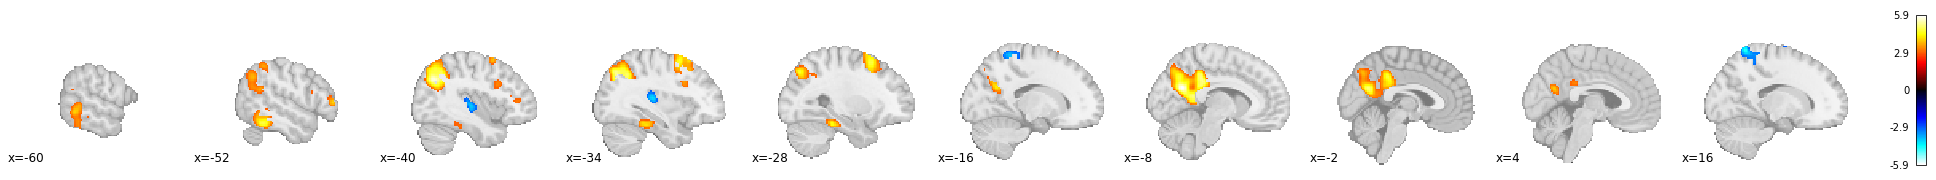

In [20]:
plotting.plot_stat_map(stat_map_img = english_objRel_thresholded, 
                          display_mode = 'x',cut_coords=10)

In [21]:
english_objRel_thresholded.to_filename('openNeuro_LPP/sencond_level/english_objRel.nii.gz')

In [22]:
table = get_clusters_table(english_objRel_thresholded, stat_threshold = english_objRel_threshold,two_sided=True)


table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
#table = table.drop(columns='Peak Stat')
table

,Cluster Size (mm3),X,Y,Z,Peak Stat
0,36832,-8.0,-62.0,24.0,5.86
1,,-38.0,-70.0,36.0,5.74
2,,-36.0,-58.0,38.0,5.25
3,,-6.0,-36.0,36.0,5.23
4,6632,-30.0,14.0,56.0,4.85
5,,-24.0,14.0,68.0,4.56
6,6992,-52.0,-48.0,-20.0,4.74
7,,-58.0,-50.0,-6.0,4.01
8,,-58.0,-34.0,-12.0,3.07
9,2256,-30.0,-34.0,-22.0,4.66


In [23]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &              36832 &  -8.0 & -62.0 &  24.0 &       5.86 \\
1  &                    & -38.0 & -70.0 &  36.0 &       5.74 \\
2  &                    & -36.0 & -58.0 &  38.0 &       5.25 \\
3  &                    &  -6.0 & -36.0 &  36.0 &       5.23 \\
4  &               6632 & -30.0 &  14.0 &  56.0 &       4.85 \\
5  &                    & -24.0 &  14.0 &  68.0 &       4.56 \\
6  &               6992 & -52.0 & -48.0 & -20.0 &       4.74 \\
7  &                    & -58.0 & -50.0 &  -6.0 &       4.01 \\
8  &                    & -58.0 & -34.0 & -12.0 &       3.07 \\
9  &               2256 & -30.0 & -34.0 & -22.0 &       4.66 \\
10 &               2688 & -48.0 &  40.0 &   6.0 &       4.28 \\
11 &               1352 & -34.0 &  14.0 &  32.0 &       3.49 \\
12 &                    & -50.0 &  14.0 &  20.0 &       3.07 \\
13 &               2792 &  16.0 & -56.0 &  72.0 &      -4.61 \

In [24]:
#english_greater_chinese_thresholded, english_greater_chinese_threshold = threshold_stats_img(english_greater_chinese, alpha=.05, 
#                                    height_control = 'fdr',two_sided=True,cluster_threshold=0)
#print(english_greater_chinese_threshold)
#plotting.plot_glass_brain(english_greater_chinese_thresholded,plot_abs=False, 
#                          threshold = english_greater_chinese_threshold,display_mode='lyrz',colorbar=True)

3.665096374001248


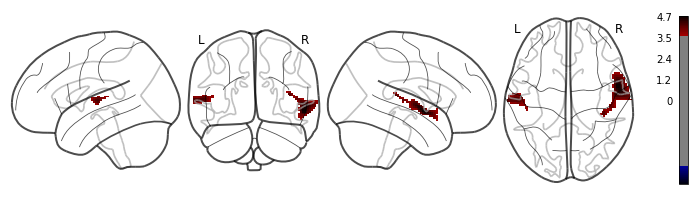

In [25]:
chinese_greater_english_thresholded, chinese_greater_english_threshold = threshold_stats_img(chinese_greater_english, alpha=.05, 
                                    height_control = 'fdr',two_sided=True,cluster_threshold=10)
print(chinese_greater_english_threshold)
plotting.plot_glass_brain(chinese_greater_english_thresholded,plot_abs=False, 
                          threshold = chinese_greater_english_threshold,display_mode='lyrz',colorbar=True)

In [26]:
chinese_greater_english_thresholded.to_filename('openNeuro_LPP/sencond_level/chinese>english.nii.gz')

In [27]:
table = get_clusters_table(chinese_greater_english_thresholded, stat_threshold = chinese_greater_english_threshold,
                          two_sided=True)


table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
#table = table.drop(columns='Peak Stat')
table

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/reporting/_get_clusters_table.py:287: UserWarning: Attention: No clusters with stat lower than -3.665096374001248
  stat_threshold * sign,


,Cluster Size (mm3),X,Y,Z,Peak Stat
0,3704,56.0,-2.0,-6.0,4.72
1,,48.0,-24.0,6.0,4.16
2,1160,-56.0,-16.0,6.0,4.29
3,,-68.0,-16.0,6.0,4.28
4,,-46.0,-26.0,10.0,3.78
5,120,38.0,-32.0,12.0,4.20


In [28]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0 &               3704 &  56.0 &  -2.0 &  -6.0 &       4.72 \\
1 &                    &  48.0 & -24.0 &   6.0 &       4.16 \\
2 &               1160 & -56.0 & -16.0 &   6.0 &       4.29 \\
3 &                    & -68.0 & -16.0 &   6.0 &       4.28 \\
4 &                    & -46.0 & -26.0 &  10.0 &       3.78 \\
5 &                120 &  38.0 & -32.0 &  12.0 &       4.20 \\
\bottomrule
\end{tabular}



## Intersection

In [47]:
# FDR = 0.05

masker = NiftiMasker(resampled_yeo_binary)

english_objRel_array = masker.fit_transform(english_objRel_map)
chinese_objRel_array = masker.fit_transform(chinese_objRel_map)

intersection = []


for i in range(len(english_objRel_array[0])):
        
    if (english_objRel_array[0][i] > 2.9265586785373197) and (chinese_objRel_array[0][i] > 2.9447206785687574):
        intersection.append(1)
             
    else:
        intersection.append(0.1)

intersection_map = masker.inverse_transform(intersection)

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)


In [48]:
overlap, _ = threshold_stats_img(intersection_map, threshold=0.2, 
                                    height_control = None,cluster_threshold=10)

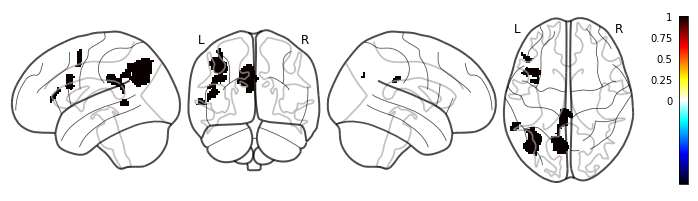

In [49]:
plotting.plot_glass_brain(overlap,display_mode='lyrz',colorbar=True,plot_abs=False)

In [40]:
english_objRel_thresholded.to_filename('openNeuro_LPP/sencond_level/objRel_intersection.nii.gz')

In [50]:
table = get_clusters_table(stat_img = overlap,stat_threshold=0.2)


table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
table = table.drop(columns='Peak Stat')
table

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/reporting/_get_clusters_table.py:99: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  "Attention: At least one of the (sub)peaks falls outside of the "


,Cluster Size (mm3),X,Y,Z
0,480,-60.0,-46.0,2.0
1,952,-40.0,16.0,28.0
2,416,-46.0,30.0,12.0
3,3736,-40.0,-64.0,44.0
4,408,-38.0,4.0,54.0
5,5640,-8.0,-56.0,30.0


In [51]:
print(table.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Cluster Size (mm3) &     X &     Y &     Z \\
\midrule
0 &                 480 & -60.0 & -46.0 &   2.0 \\
1 &                 952 & -40.0 &  16.0 &  28.0 \\
2 &                 416 & -46.0 &  30.0 &  12.0 \\
3 &                3736 & -40.0 & -64.0 &  44.0 \\
4 &                 408 & -38.0 &   4.0 &  54.0 \\
5 &                5640 &  -8.0 & -56.0 &  30.0 \\
\bottomrule
\end{tabular}

